# Trabajo Práctico para la materia Laboratorio de Datos.
Integrantes:
- Leo Mansini
- Aldana Mercado
- Nicolás Sawczuk 

Se utilizó el siguiente dataset: [Framingham Heart study dataset](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression)

El objetivo es predecir si, dadas métricas relacionadas a factores de riesgo de una persona, esa persona tiene riesgo de sufrir [enfermedad de las arterias coronarias](https://es.wikipedia.org/wiki/Enfermedad_coronaria) a 10 años en el futuro.

Además se estudió la distribución de los datos, y para cada modelo se los comparó en base a su precisión como también sus errores de tipo I y II.

In [ ]:
# Traemos los datos
filename = 'framingham.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Librerias que usamos
import pandas as pd
import numpy as np

#Necesito 3.4.2 para bar_label
!pip install matplotlib==3.4.2
import matplotlib.pyplot as plt

In [ ]:
#Le ponemos nombre al data-set
data = pd.read_csv(filename)

In [ ]:
#Formato de nuestros datos
data.shape

(4238, 16)

In [ ]:
# Features
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#Visualizamos el Dataset
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
#Nos fijamos cuantas columnas tienen NaN
for col in data.columns:
  print(col, data[col].isna().sum())

male 0
age 0
education 105
currentSmoker 0
cigsPerDay 29
BPMeds 53
prevalentStroke 0
prevalentHyp 0
diabetes 0
totChol 50
sysBP 0
diaBP 0
BMI 19
heartRate 1
glucose 388
TenYearCHD 0


In [ ]:
data = data.dropna() # Dropeamos los NaN, se puede elegir otro criterio para rellenar los datos faltantes

In [ ]:
data.shape #Saco pocos datos asi que estamos bien

(3656, 16)

In [ ]:
X = data.drop("TenYearCHD", axis = 1) #Hacemos que la columna "TenYearCHD" sea nuestro objetivo a predecir
y = data["TenYearCHD"]

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Dividimos el dataset en train y test

In [ ]:
y.name

'TenYearCHD'

In [ ]:
corr = data.corr()

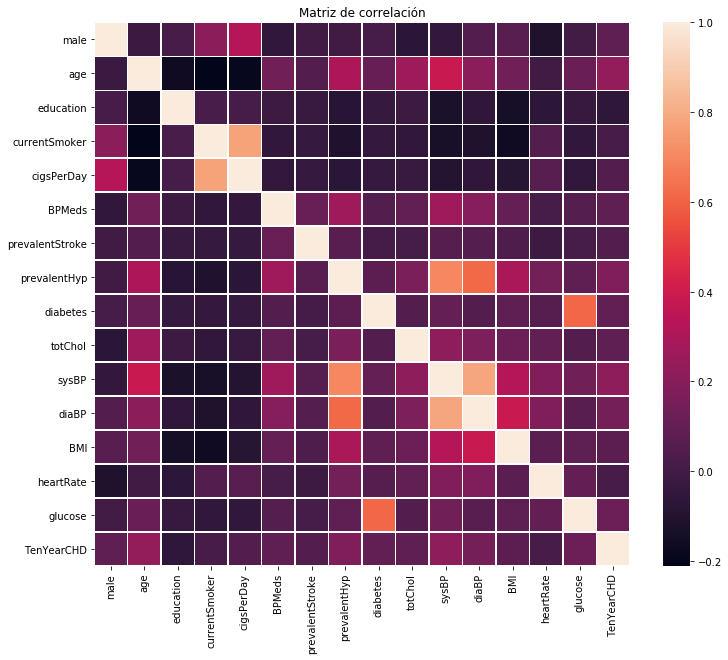

In [ ]:
import seaborn as sbn
fig = plt.figure(figsize=(12, 10))
sbn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths=0.5)
plt.title("Matriz de correlación")
plt.savefig("corrMat.png", dpi = 300)

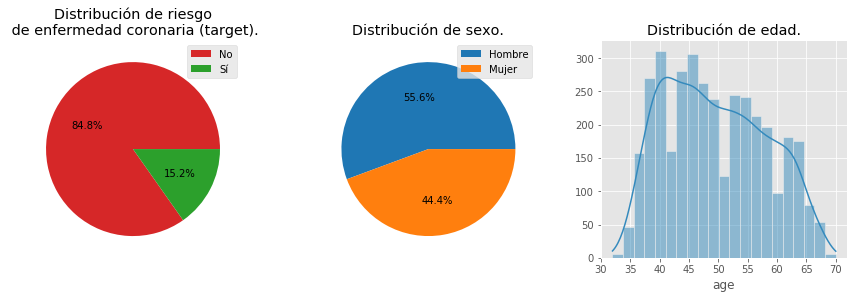

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
my_colors = [name for name, color in mcolors.TABLEAU_COLORS.items()]

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 3, figsize= (15, 4))

ax[0].pie(y.value_counts(), labels =["No", "Sí"], labeldistance = None, colors= my_colors[2:4][::-1], autopct='%1.1f%%')
ax[0].legend()
ax[0].set_title("Distribución de riesgo\n de enfermedad coronaria (target).")

ax[1].pie(X["male"].value_counts(), labels =["Hombre", "Mujer"], labeldistance = None, colors= my_colors[:2], autopct='%1.1f%%')
ax[1].legend()
ax[1].set_title("Distribución de sexo.")

sbn.histplot(X["age"], ax = ax[2], kde = True)
ax[2].set_xticks(np.arange(X["age"].min()-2, X["age"].max()+3, 5))
ax[2].set_ylabel("")
ax[2].set_title("Distribución de edad.")

plt.savefig("Distribuciones.png", dpi = 300)

Las clases dentro de la columna target estan desbalanceadas, solo el 15.2% de las instancias tiene riesgo de enfermedad.

In [ ]:
from sklearn.metrics import confusion_matrix

def test_model(model, X, y, print_text=True):
  score = model.score(X, y)
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred)
  sensibilidad = cm[1,1]/(cm[1,1]+cm[1,0])
  especificidad = cm[0,0]/(cm[0,1]+cm[0,0])
  metricas = [score, sensibilidad, especificidad, (sensibilidad + especificidad)/2]
  if print_text:
    print("Modelo:" + type(model).__name__)
    print('El score del modelo es de: {}'.format(round(score,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
    print('Matriz de confusion del modelo es:')
    print(cm)
    print('Sensibilidad del modelo es de: {}'.format(round(metricas[1],4)))  
    print('Especificidad del modelo es de: {}'.format(round(metricas[2],4)))  
    print('BA del modelo es de: {}'.format(round(metricas[3],4)))
  return metricas

### Es importante generar la matriz de confusión del modelo para entender mejor su performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logist = LogisticRegression(max_iter=10000)
model_logist.fit(X_train, y_train) # Lo aplicamos

model_logist_balanced = LogisticRegression(max_iter=10000, class_weight = "balanced") #Traemos el modelo de regresion logistica
model_logist_balanced.fit(X_train, y_train) # Lo aplicamos

print("RegLog balanceado")
met_bal = test_model(model_logist_balanced, X_test, y_test)
print("\n")
print("RegLog no balanceado")
met = test_model(model_logist, X_test, y_test)


RegLog balanceado
Modelo:LogisticRegression
El score del modelo es de: 0.6673
Matriz de confusion del modelo es:
[[620 319]
 [ 46 112]]
Sensibilidad del modelo es de: 0.7089
Especificidad del modelo es de: 0.6603
BA del modelo es de: 0.6846


RegLog no balanceado
Modelo:LogisticRegression
El score del modelo es de: 0.8624
Matriz de confusion del modelo es:
[[932   7]
 [144  14]]
Sensibilidad del modelo es de: 0.0886
Especificidad del modelo es de: 0.9925
BA del modelo es de: 0.5406


El modelo tiene gran error de tipo II. Eso es grave en la medicina, al haber mucha proporción de personas con riesgo las cuales el modelo no reconoce.

Para remediarlo, se entrenan modelos balanceando las clases, esto es, asignando pesos a cada instancia inversamente proporcionales a la clase a la que pertenecen, de esa manera priorizando predecir correctamente a los enfermos que a los sanos. Esto irremediablemente aumentará el error de tipo I, algo que consideraremos tolerable.

AttributeError: ignored

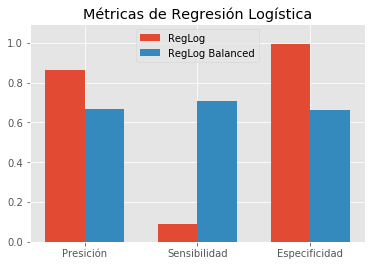

In [ ]:
labels = ["Presición", "Sensibilidad", "Especificidad"]
width = 0.35  # the width of the bars
x = np.arange(len(labels))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, [round(i, 3) for i in met[:3]], width, label='RegLog')
rects2 = ax.bar(x + width/2, [round(i, 3) for i in met_bal[:3]], width, label='RegLog Balanced')

ax.set_ylabel('')
ax.set_title('Métricas de Regresión Logística')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(max(min(min(met[:3]), min(met_bal[:3]))-0.1, 0), max(max(met[:3]), max(met_bal))+0.1)
ax.legend(loc = "upper center")

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("RegLog Metricas.png", dpi = 300)

Sensibilidad, o proporción de positivos reconocidos, incrementa considerablemente.

Ahora con todos los modelos.

Se utilizará:
- Logistic Regression
- Support Vector Machines Classifier
- Decision Tree Classifier
- Random Forest Classifier (ensemble)
- KNeighbours Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


classifiers = [ #vector de algoritmos de clasificacion
    LogisticRegression(max_iter=10000),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(max_depth=8, n_estimators=100),
    KNeighborsClassifier(5)
    ]

classifiers_balanced = [ #vector de algoritmos de clasificacion
    LogisticRegression(max_iter=10000, class_weight = "balanced"),
    SVC(kernel="linear", C=0.025, probability=True, class_weight = "balanced"),
    DecisionTreeClassifier(max_depth=8, class_weight = "balanced"),
    RandomForestClassifier(max_depth=8, n_estimators=100, class_weight = "balanced_subsample"),
    KNeighborsClassifier(5)
    ]
modelos =["RegLog", "SVC", "DesTree", "Ensemble", "KNN"]

In [ ]:
def scaler(X_train, X_test):   # scaleamos los datos
  std_scale = StandardScaler() 
  std_scale.fit(X_train)
  X_train_scaled = std_scale.transform(X_train)
  
  std_scale = StandardScaler()
  std_scale.fit(X_test)
  X_test_scaled = std_scale.transform(X_test)
  
  return X_train_scaled, X_test_scaled

from sklearn.model_selection import StratifiedKFold

def fit_models(X, y, balanced = False): #aplicamos los modelos
  if balanced:
    classifiers = classifiers_balanced
  if type(X) != type(np.array([])):
    X = X.to_numpy()
  if type(y) != type(np.array([])):
    y = y.to_numpy()
  skf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
  skf.get_n_splits(X, y) # arma los folds a partir de los datos
  accuracies_res = np.zeros((5, len(classifiers)))
  sens = np.zeros((5, len(classifiers)))
  j = 0
#hago un split diferente para cada conjunto de 6 algoritmos
  for train_index, test_index in skf.split(X, y): # va generando los indices que corresponden a train y test en cada fold
    X_train, X_test = X[train_index], X[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
    y_train, y_test = y[train_index], y[test_index]     # idem con los targets
    X_train, X_test = scaler(X_train, X_test) #scaleo
    for i in range(len(classifiers)):
      model = classifiers[i]
      #print(f"Iteracion {j+1}, Modelo: " + type(model).__name__)
      model.fit(X_train, y_train)
      accuracies_res[j, i] = model.score(X_test, y_test)
      if j == 4:
        print("\n")
        sens[j, i] = test_model(model, X_test, y_test)[1]
      else:
        sens[j, i] = test_model(model, X_test, y_test, print_text=False)[1]
    j = j+1
  return np.asarray([i.mean() for i in np.transpose(accuracies_res)]), np.asarray([i.mean() for i in np.transpose(sens)])

In [ ]:
accuracies, sensibilities = fit_models(X, y, balanced=True)



Modelo:LogisticRegression
El score del modelo es de: 0.6772
Matriz de confusion del modelo es:
[[419 200]
 [ 36  76]]
Sensibilidad del modelo es de: 0.6786
Especificidad del modelo es de: 0.6769
BA del modelo es de: 0.6777


Modelo:SVC
El score del modelo es de: 0.6594
Matriz de confusion del modelo es:
[[401 218]
 [ 31  81]]
Sensibilidad del modelo es de: 0.7232
Especificidad del modelo es de: 0.6478
BA del modelo es de: 0.6855


Modelo:DecisionTreeClassifier
El score del modelo es de: 0.6635
Matriz de confusion del modelo es:
[[427 192]
 [ 54  58]]
Sensibilidad del modelo es de: 0.5179
Especificidad del modelo es de: 0.6898
BA del modelo es de: 0.6038


Modelo:RandomForestClassifier
El score del modelo es de: 0.777
Matriz de confusion del modelo es:
[[531  88]
 [ 75  37]]
Sensibilidad del modelo es de: 0.3304
Especificidad del modelo es de: 0.8578
BA del modelo es de: 0.5941


Modelo:KNeighborsClassifier
El score del modelo es de: 0.8358
Matriz de confusion del modelo es:
[[599  20

AttributeError: ignored

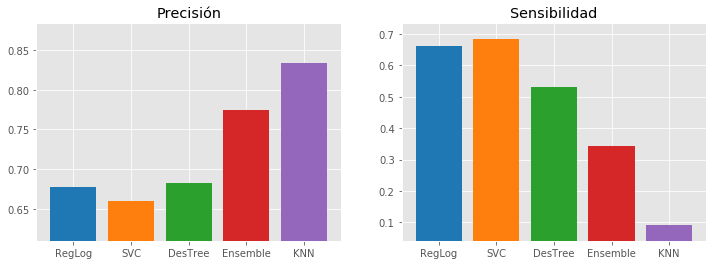

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
rects1 = ax[0].bar(modelos, height = [round(i, 3) for i in accuracies], label = modelos, color = my_colors)
ax[0].set_ylim(accuracies.min()-0.05, accuracies.max()+0.05)
ax[0].set_title("Precisión")

rects2 = ax[1].bar(modelos, height = [round(i, 3) for i in sensibilities], label = modelos, color = my_colors)
ax[1].set_ylim(sensibilities.min()-0.05, sensibilities.max()+0.05)
ax[1].set_title("Sensibilidad")

ax[0].bar_label(rects1, padding=3)
ax[1].bar_label(rects2, padding=3)

plt.savefig("Comparacion Modelos.png", dpi = 300)

Precisión inversamente relacionado a la sensibilidad, esto simboliza que se diagnostica mucha mas gente como enferma cuando en realidad no lo esta (pérdida de precisión), con tal de que se detecten más enfermos (ganancia en sensibilidad).

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

# Ajustamos el estandarizador
std_scale.fit(X)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_scaled = std_scale.transform(X)

pca = PCA(n_components=None)

# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)

X.shape, X_pca.shape

((3656, 15), (3656, 15))

Se estudió si PCA sirve para el estudio del dataset. Se grafica cuantas componentes principales tienen la mayoría de la varianza.

Text(0.5, 0, 'Cantidad de componentes principales')

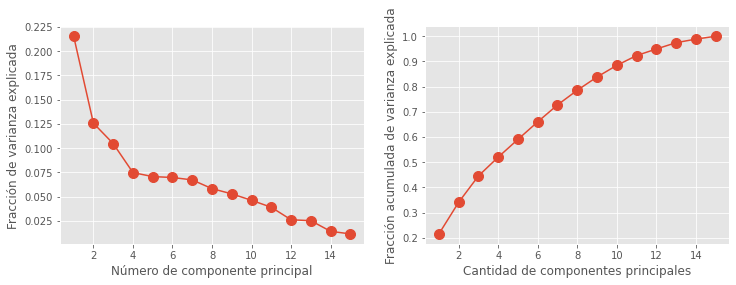

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

In [ ]:
pca = PCA(n_components=2)  # USAR DOS COMPONETES MEJORA EL MODELO?

# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)

accuracies_pca, sensibilities_pca = fit_models(X_scaled, y, balanced = True)



Modelo:LogisticRegression
El score del modelo es de: 0.6758
Matriz de confusion del modelo es:
[[416  34]
 [203  78]]
Sensibilidad del modelo es de: 0.6964
Especificidad del modelo es de: 0.6721
BA del modelo es de: 0.6842


Modelo:SVC
El score del modelo es de: 0.6635
Matriz de confusion del modelo es:
[[406  33]
 [213  79]]
Sensibilidad del modelo es de: 0.7054
Especificidad del modelo es de: 0.6559
BA del modelo es de: 0.6806


Modelo:DecisionTreeClassifier
El score del modelo es de: 0.7114
Matriz de confusion del modelo es:
[[449  41]
 [170  71]]
Sensibilidad del modelo es de: 0.6339
Especificidad del modelo es de: 0.7254
BA del modelo es de: 0.6796


Modelo:RandomForestClassifier
El score del modelo es de: 0.7825
Matriz de confusion del modelo es:
[[523  63]
 [ 96  49]]
Sensibilidad del modelo es de: 0.4375
Especificidad del modelo es de: 0.8449
BA del modelo es de: 0.6412


Modelo:KNeighborsClassifier
El score del modelo es de: 0.8276
Matriz de confusion del modelo es:
[[594 10

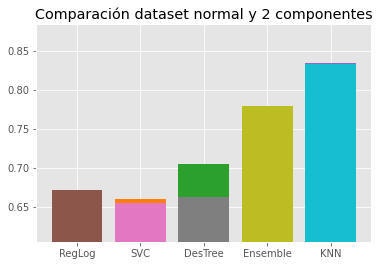

In [ ]:
fig, ax = plt.subplots()

ax.bar(modelos, height = accuracies, label = modelos, color = my_colors)
ax.bar(modelos, height = accuracies_pca, label = modelos, color = my_colors[5:]) # USAR DOS COMPONETES MEJORA EL MODELO?
ax.set_ylim(min(accuracies_pca.min(), accuracies.min())-0.05, max(accuracies_pca.max(), accuracies.max())+0.05)
ax.set_title("Comparación dataset normal y 2 componentes") # grande
plt.show()

Principal Component Analysis no reflejó mejora en los resultados.

In [ ]:
X_pw = np.concatenate((X, X**2, X**3), axis=1)
accuracies_pw, sensibilities_pw = fit_models(X_pw, y, balanced = True)



Modelo:LogisticRegression
El score del modelo es de: 0.6908
Matriz de confusion del modelo es:
[[423  30]
 [196  82]]
Sensibilidad del modelo es de: 0.7321
Especificidad del modelo es de: 0.6834
BA del modelo es de: 0.7078


Modelo:SVC
El score del modelo es de: 0.6936
Matriz de confusion del modelo es:
[[426  31]
 [193  81]]
Sensibilidad del modelo es de: 0.7232
Especificidad del modelo es de: 0.6882
BA del modelo es de: 0.7057


Modelo:DecisionTreeClassifier
El score del modelo es de: 0.6416
Matriz de confusion del modelo es:
[[402  45]
 [217  67]]
Sensibilidad del modelo es de: 0.5982
Especificidad del modelo es de: 0.6494
BA del modelo es de: 0.6238


Modelo:RandomForestClassifier
El score del modelo es de: 0.7948
Matriz de confusion del modelo es:
[[542  73]
 [ 77  39]]
Sensibilidad del modelo es de: 0.3482
Especificidad del modelo es de: 0.8756
BA del modelo es de: 0.6119


Modelo:KNeighborsClassifier
El score del modelo es de: 0.8372
Matriz de confusion del modelo es:
[[600 10

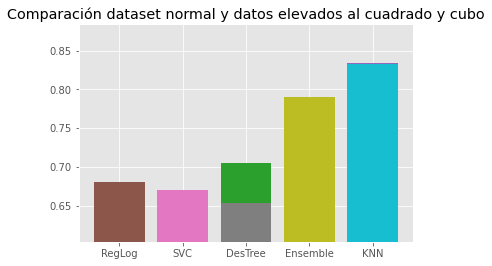

In [ ]:
fig, ax = plt.subplots()

ax.bar(modelos, height = accuracies, label = modelos, color = my_colors)
ax.bar(modelos, height = accuracies_pw, label = modelos, color = my_colors[5:])
ax.set_ylim(min(accuracies_pw.min(), accuracies.min())-0.05, max(accuracies_pw.max(), accuracies.max())+0.05)
ax.set_title("Comparación dataset normal y datos elevados al cuadrado y cubo") # grande
plt.show()

Aplicar Feature Engineering elevando al cuadrado y al cubo las features tampoco produjo una mejora en la precisión de los modelos.

Más análisis del dataset. La edad y el género están correlacionadas (positivamente) con el riesgo de la enfermedad.

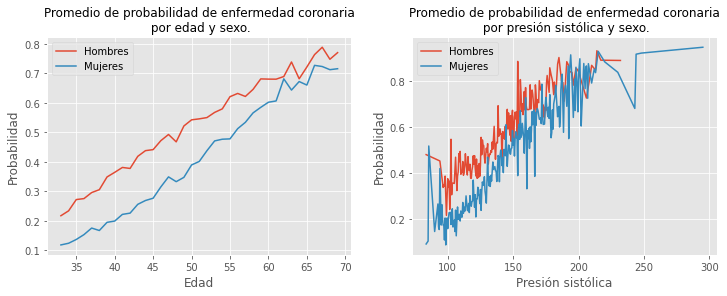

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

X_male = X[X["male"] == 1]
X_male = X_male.reset_index(drop = True)
probas_male = model_logist_balanced.predict_proba(X_male)[:,1]

ages_male = X_male["age"].unique()
ages_male = np.sort(ages_male)
probas_male_mean = np.zeros(len(ages_male))
for i, age in enumerate(ages_male):
  probas_male_mean[i] = probas_male[np.asarray(X_male[X_male["age"] == age].index)].mean()

ax[0].plot(ages_male, probas_male_mean, label = "Hombres")

X_female = X[X["male"] != 1]
X_female = X_female.reset_index(drop = True)
probas_female = model_logist_balanced.predict_proba(X_female)[:,1]

ages_female = X_male["age"].unique()
ages_female = np.sort(ages_female)
probas_female_mean = np.zeros(len(ages_female))
for i, age in enumerate(ages_female):
  probas_female_mean[i] = probas_female[np.asarray(X_female[X_female["age"] == age].index)].mean()

ax[0].plot(ages_female, probas_female_mean, label = "Mujeres")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Probabilidad")
ax[0].set_title("Promedio de probabilidad de enfermedad coronaria\n por edad y sexo.", fontsize = 12)
ax[0].legend()

bp_male = X_male["sysBP"].unique()
bp_male = np.sort(bp_male)
probas_male_mean_bp = np.zeros(len(bp_male))
for i, bp in enumerate(bp_male):
  probas_male_mean_bp[i] = probas_male[np.asarray(X_male[X_male["sysBP"] == bp].index)].mean()

ax[1].plot(bp_male, probas_male_mean_bp, label = "Hombres")

bp_female = X_female["sysBP"].unique()
bp_female = np.sort(bp_female)
probas_female_mean_bp = np.zeros(len(bp_female))
for i, bp in enumerate(bp_female):
  probas_female_mean_bp[i] = probas_female[np.asarray(X_female[X_female["sysBP"] == bp].index)].mean()

ax[1].plot(bp_female, probas_female_mean_bp, label = "Mujeres")
ax[1].set_xlabel("Presión sistólica")
ax[1].set_ylabel("Probabilidad")
ax[1].set_title("Promedio de probabilidad de enfermedad coronaria\n por presión sistólica y sexo.", fontsize = 12)

ax[1].legend()

plt.savefig("Features principales mujer hombre.png", dpi = 300)

A modo ilustrativo se grafica un árbol de decisión con las clases balanceadas.

Modelo:DecisionTreeClassifier
El score del modelo es de: 0.6527
Matriz de confusion del modelo es:
[[596  62]
 [319 120]]
Sensibilidad del modelo es de: 0.6593
Especificidad del modelo es de: 0.6514
BA del modelo es de: 0.6554


[0.6526891522333638,
 0.6593406593406593,
 0.6513661202185792,
 0.6553533897796193]

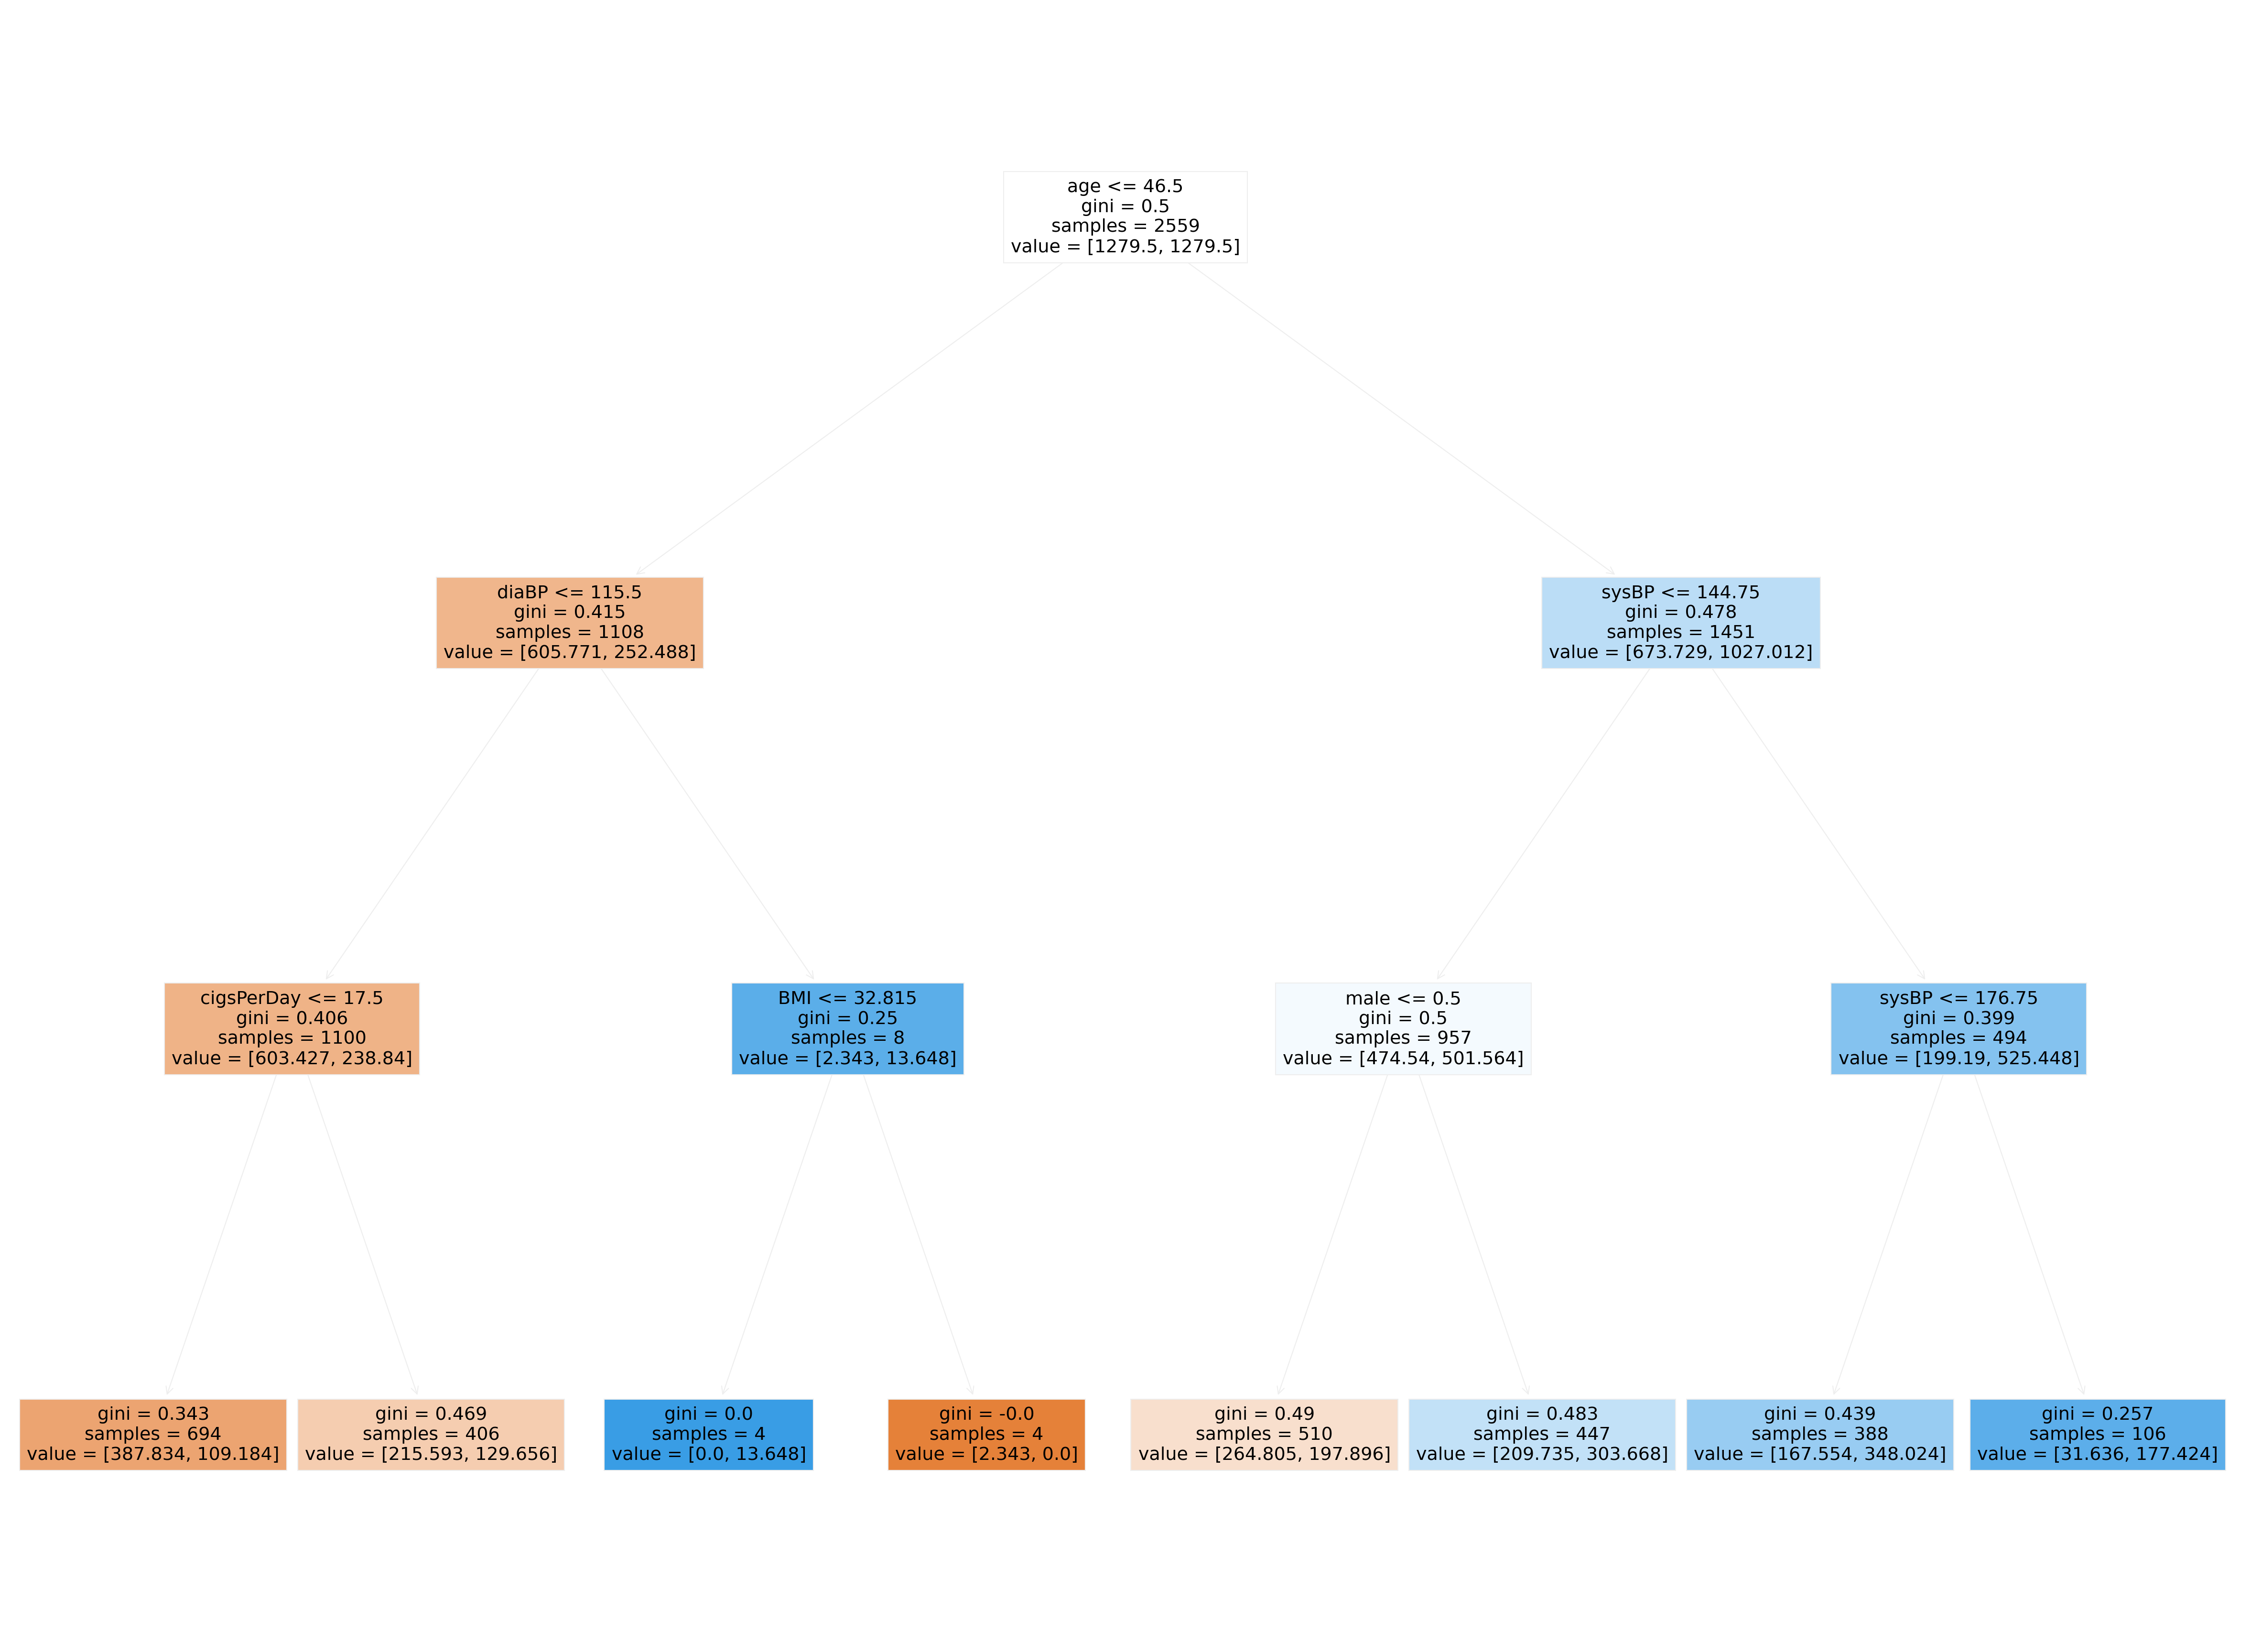

In [ ]:
from sklearn.tree import plot_tree # Función para visualizar el árbol
model_tree = DecisionTreeClassifier(max_depth=3, class_weight="balanced")
model_tree.fit(X_train, y_train)

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (20, 15), dpi=300)
plot_tree(model_tree, filled = True, ax = ax, feature_names = X.columns)
plt.savefig("Arbol.png", dpi = 300, transparent=True)

model_tree.score(X_train, y_train)
y_train.value_counts()

ypred = model_tree.predict(X_train)
test_model(model_tree, X_test, y_test)